In [1]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torchinfo
import FinanceDataReader as fdr
from sklearn.preprocessing import MinMaxScaler, StandardScaler # MM: y, SS: x
from sklearn.model_selection import train_test_split  

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [2]:
import pandas as pd
df = pd.read_csv('usd_kospi.csv')
df = df.dropna()
df.set_index("Date", inplace=True)
df

,usd_krw_usd_krw_Open,usd_krw_usd_krw_High,usd_krw_usd_krw_Low,usd_krw_usd_krw_Close,usd_krw_usd_krw_Adj Close,usd_krw_usd_krw_Volume,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,,,,,,,
2003-12-01,1197.300049,1203.500000,1195.000000,1198.400024,1198.400024,0.0,796.36,811.49,790.80,807.39,584981695,0.0141,1,11.21,2550377558805,349500523487910
2003-12-02,1198.099976,1198.500000,1186.199951,1195.000000,1195.000000,0.0,813.49,813.95,806.30,807.78,531989534,0.0005,1,0.39,2437988447945,349565163750845
2003-12-03,1195.000000,1198.400024,1192.500000,1192.500000,1192.500000,0.0,807.17,816.02,801.08,808.34,440581943,0.0007,1,0.56,2428345205640,349870920905375
2003-12-04,1192.599976,1197.900024,1174.800049,1190.099976,1190.099976,0.0,805.10,809.68,800.31,805.13,493935192,-0.0040,2,-3.21,2390462801590,348454820024130
2003-12-05,1189.400024,1193.800049,1178.599976,1184.699951,1184.699951,0.0,802.71,802.86,789.41,789.41,426505593,-0.0195,2,-15.72,2144828459030,341762940055240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-30,1370.550049,1380.930054,1369.739990,1370.550049,1370.550049,0.0,2666.63,2666.63,2635.44,2635.44,372741998,-0.0156,2,-41.86,11132062547655,2150594911810807
2024-05-31,1375.619995,1387.489990,1375.359985,1375.619995,1375.619995,0.0,2657.87,2664.48,2635.77,2636.52,613717789,0.0004,1,1.08,16353906904146,2151017465412147
2024-06-03,1382.099976,1382.109985,1369.969971,1382.099976,1382.099976,0.0,2657.81,2690.73,2657.81,2682.52,782329142,0.0174,1,46.00,13995552060921,2188764087625754


In [3]:
#####################################   코스피, 원화 둘다 같이 lstm           ################################################
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import ModelCheckpoint

# df에 NaN 값 확인
print("NaN values in the dataset:")
print(df.isna().sum())

# NaN 값 처리 - 여기서는 제거하는 것으로 가정
df = df.dropna()

NaN values in the dataset:
usd_krw_usd_krw_Open         0
usd_krw_usd_krw_High         0
usd_krw_usd_krw_Low          0
usd_krw_usd_krw_Close        0
usd_krw_usd_krw_Adj Close    0
usd_krw_usd_krw_Volume       0
Open                         0
High                         0
Low                          0
Close                        0
Volume                       0
Change                       0
UpDown                       0
Comp                         0
Amount                       0
MarCap                       0
dtype: int64


In [4]:
df

,usd_krw_usd_krw_Open,usd_krw_usd_krw_High,usd_krw_usd_krw_Low,usd_krw_usd_krw_Close,usd_krw_usd_krw_Adj Close,usd_krw_usd_krw_Volume,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,,,,,,,
2003-12-01,1197.300049,1203.500000,1195.000000,1198.400024,1198.400024,0.0,796.36,811.49,790.80,807.39,584981695,0.0141,1,11.21,2550377558805,349500523487910
2003-12-02,1198.099976,1198.500000,1186.199951,1195.000000,1195.000000,0.0,813.49,813.95,806.30,807.78,531989534,0.0005,1,0.39,2437988447945,349565163750845
2003-12-03,1195.000000,1198.400024,1192.500000,1192.500000,1192.500000,0.0,807.17,816.02,801.08,808.34,440581943,0.0007,1,0.56,2428345205640,349870920905375
2003-12-04,1192.599976,1197.900024,1174.800049,1190.099976,1190.099976,0.0,805.10,809.68,800.31,805.13,493935192,-0.0040,2,-3.21,2390462801590,348454820024130
2003-12-05,1189.400024,1193.800049,1178.599976,1184.699951,1184.699951,0.0,802.71,802.86,789.41,789.41,426505593,-0.0195,2,-15.72,2144828459030,341762940055240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-30,1370.550049,1380.930054,1369.739990,1370.550049,1370.550049,0.0,2666.63,2666.63,2635.44,2635.44,372741998,-0.0156,2,-41.86,11132062547655,2150594911810807
2024-05-31,1375.619995,1387.489990,1375.359985,1375.619995,1375.619995,0.0,2657.87,2664.48,2635.77,2636.52,613717789,0.0004,1,1.08,16353906904146,2151017465412147
2024-06-03,1382.099976,1382.109985,1369.969971,1382.099976,1382.099976,0.0,2657.81,2690.73,2657.81,2682.52,782329142,0.0174,1,46.00,13995552060921,2188764087625754


In [5]:
# 2개의 컬럼을 Feature로 사용
cols = ['usd_krw_usd_krw_Close', 'Close']
data = df[cols].values

In [6]:
data

array([[1198.400024,  807.39    ],
       [1195.      ,  807.78    ],
       [1192.5     ,  808.34    ],
       ...,
       [1382.099976, 2682.52    ],
       [1370.790039, 2662.1     ],
       [1373.719971, 2689.5     ]])

In [7]:
# 데이터 스케일링 (0과 1 사이 값으로 스케일링)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [8]:
# 시계열 데이터를 윈도우로 나누기
sequence_length = 30  # 30일 데이터 기준으로
forecast_days = 5  # 앞으로 5일을 예측
X = []
y = []
for i in range(len(data) - sequence_length - forecast_days + 1):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length:i + sequence_length + forecast_days])

X = np.array(X)
y = np.array(y)

In [9]:
X[:5]

array([[[0.45525181, 0.03395704],
        [0.45028624, 0.03410787],
        [0.44663511, 0.03432446],
        [0.44312999, 0.03308297],
        [0.43524352, 0.02700319],
        [0.43655796, 0.02522026],
        [0.43232262, 0.02620648],
        [0.42312189, 0.02902592],
        [0.41362896, 0.02766841],
        [0.41844834, 0.03345039],
        [0.42823346, 0.0396694 ],
        [0.42808746, 0.035272  ],
        [0.43860263, 0.03113373],
        [0.43392926, 0.03399958],
        [0.44707332, 0.03543057],
        [0.45101646, 0.03285479],
        [0.45087045, 0.03182602],
        [0.45831872, 0.0282176 ],
        [0.45861074, 0.02678661],
        [0.43728819, 0.02817506],
        [0.44999422, 0.03524106],
        [0.45145467, 0.03932132],
        [0.42677301, 0.04041971],
        [0.44210775, 0.04016058],
        [0.4237061 , 0.04156837],
        [0.41523542, 0.04043904],
        [0.43027813, 0.0486073 ],
        [0.4120225 , 0.05074218],
        [0.42151543, 0.04982944],
        [0.421

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 예측 대상인 forecast_days를 사용하여 reshape
y_train = y_train.reshape(-1, forecast_days * len(cols))
y_val = y_val.reshape(-1, forecast_days * len(cols))

In [26]:
# LSTM 모델 구축
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(forecast_days * len(cols)))  # 출력 레이어를 forecast_days * feature 수로 설정
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# ModelCheckpoint 콜백 설정
checkpoint = ModelCheckpoint('checkpoint.keras',
                             monitor='val_loss',  # 모델을 저장할 때 기준이 되는 값 (검증 손실)
                             save_best_only=True,  # 가장 좋은(낮은 손실) 모델만 저장
                             save_weights_only=False,  # 모델 아키텍처와 가중치 모두 저장
                             mode='min',  # 손실을 최소화하는 방향으로 모델을 저장
                             verbose=1  # 저장할 때 메시지 출력
                             )

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint])
# 베스트 weights 로드
model.load_weights('checkpoint.keras')

# 모델을 사용하여 예측
predictions = model.predict(X_val)

Epoch 1/50


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/63 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1302 - mse: 0.1302
Epoch 1: val_loss improved from inf to 0.00932, saving model to checkpoint.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1255 - mse: 0.1255 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0064 - mse: 0.0064
Epoch 2: val_loss improved from 0.00932 to 0.00228, saving model to checkpoint.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3/50
60/63 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019 - mse: 0.0019
Epoch 3: val_loss improved from 0.00228 to 0.00116, saving model to checkpoint.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - mse: 0.0012
Epoch 4: val_loss improved from 0.00116 to 0.00108, saving model to checkpoint.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/st

In [12]:
# 예측 성능 평가
mse = mean_squared_error(y_val, predictions)
mae = mean_absolute_error(y_val, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.00046358600454887955
Mean Absolute Error: 0.015275321142864857


In [13]:
# 모델을 사용하여 예측, 배치를 위해서 1차원을 추가하여 input 데이터 맞춰야 합니다.
predictions = model.predict(np.array([data[-sequence_length:]]))

reshaped_predictions = predictions[0].reshape(forecast_days, len(cols))  # (1, forecast_days * len(cols)) => (forecast_days, len(cols)) 차원 변경 
original_predictions = scaler.inverse_transform(reshaped_predictions)

predict_df = pd.DataFrame(original_predictions, columns=cols)

# 원천 데이터의 날짜 마지막일자 이후로 5일자 날짜를 index로 구성
last_date = pd.to_datetime(df.index[-1])  # data.index의 마지막 날짜를 datetime으로 변환
date_range = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days, freq='D')  # 마지막 날짜 다음날부터 5일치 날짜 생성
predict_df.index = date_range  # 예측 결과의 index를 생성한 날짜 범위로 설정

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [14]:
# 저장할 디렉토리 경로와 파일 이름을 포함한 전체 경로 지정
directory_path = r'C:\Users\USER\Desktop\JH\DA-35\proj\CSV'
file_name = 'predict_df_LSTM.csv'
file_path = f'{directory_path}\\{file_name}'

# DataFrame을 지정한 경로에 CSV 파일로 저장
predict_df.to_csv(file_path, index=False)

print(f'CSV 파일이 {file_path}에 저장되었습니다.')

OSError: Cannot save file into a non-existent directory: 'C:\Users\USER\Desktop\JH\DA-35\proj\CSV'

In [16]:
#코스피 6/6-6/10
df_kos = fdr.DataReader('KS11', '2024-06-06')
df_kos = pd.DataFrame(df_kos)
df_kos.index = df_kos.index.strftime('%m-%d')

In [17]:
#달러환율 6/6-6/10
df_usd_krw = fdr.DataReader('USD/KRW', '2024-06-06')
df_usd_krw = pd.DataFrame(df_usd_krw)
df_usd_krw.index = df_usd_krw.index.strftime('%m-%d')

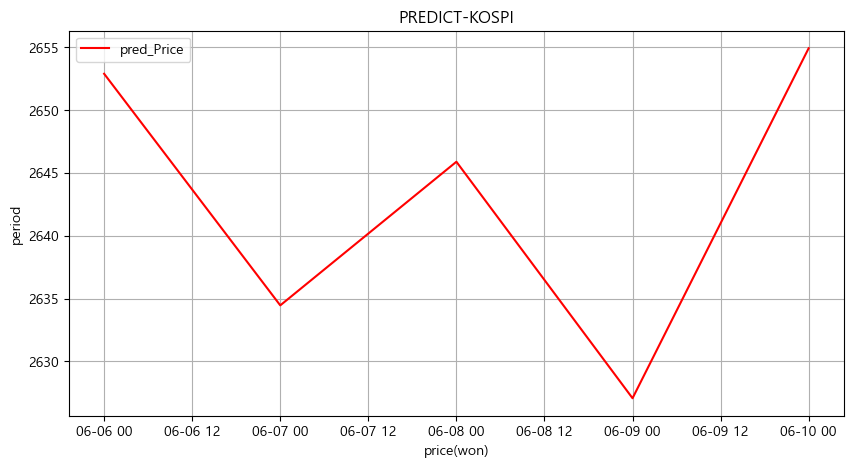

In [18]:
plt.figure(figsize = (10,5))
plt.xlabel('price(won)')
plt.ylabel('period')
plt.grid()

plt.plot(predict_df['Close'], label='pred_Price', color='r')
plt.title('PREDICT-KOSPI')

plt.legend(loc='best')
plt.show()

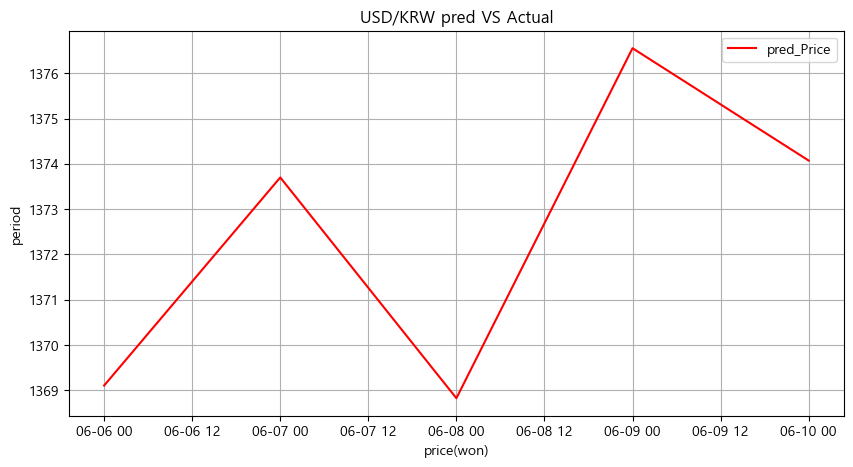

In [19]:
plt.figure(figsize = (10,5))
plt.xlabel('price(won)')
plt.ylabel('period')
plt.grid()

plt.plot(predict_df['usd_krw_usd_krw_Close'], label='pred_Price', color='r')
plt.legend(loc='best')
plt.title('USD/KRW pred VS Actual')

plt.show()

In [20]:
#비교 데이터프레임 만들기 
data = [
    [predict_df['usd_krw_usd_krw_Close'].iloc[0], df_usd_krw['Close'].iloc[0],predict_df['Close'].iloc[0],df_kos['Close'].iloc[0]],
    [predict_df['usd_krw_usd_krw_Close'].iloc[1], df_usd_krw['Close'].iloc[1],predict_df['Close'].iloc[1],df_kos['Close'].iloc[1]],
    [predict_df['usd_krw_usd_krw_Close'].iloc[2], df_usd_krw['Close'].iloc[2],'공휴일','공휴일'],
    [predict_df['usd_krw_usd_krw_Close'].iloc[3], df_usd_krw['Close'].iloc[3],'공휴일','공휴일'],
    [predict_df['usd_krw_usd_krw_Close'].iloc[4], df_usd_krw['Close'].iloc[4],predict_df['Close'].iloc[4],df_kos['Close'].iloc[4]]
]

results_LSTM = pd.DataFrame(

    data=data,
    index=['6/6', '6/7', '6/8', '6/9', '6/10'],
    columns=['USD/KRW예측값', 'USD/KRW실제값','KOSPI예측값','KOSPI실제값']
)

## LSTM_달러환율 및 코스피 예측값과 실제값 비교

In [21]:
results_LSTM

,USD/KRW예측값,USD/KRW실제값,KOSPI예측값,KOSPI실제값
6/6,1369.105713,1368.739990,2652.877197,2722.67
6/7,1373.699463,1365.250000,2634.454102,2701.17
6/8,1368.825806,1379.050049,공휴일,공휴일
6/9,1376.551880,1373.959961,공휴일,공휴일
6/10,1374.072144,1377.359985,2654.909424,2754.89


In [23]:
data = [mse,mae]
res = pd.DataFrame(data=data, index=['MSE','MAE'],columns=['LSTM 성능평가'])
res

,LSTM 성능평가
MSE,0.000464
MAE,0.015275


In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 예측값과 실제값
predictions = [1369.105713, 1373.699463, 1368.825806, 1376.551880, 1374.072144]
actuals = [1368.739990, 1365.250000, 1379.050049, 1373.959961, 1377.359985]

# MSE와 MAE 계산
mse_usd_krw = mean_squared_error(actuals, predictions)
mae_usd_krw = mean_absolute_error(actuals, predictions)

print("USD/KRW 예측값과 실제값:")
print("Mean Squared Error (MSE):", mse_usd_krw)
print("Mean Absolute Error (MAE):", mae_usd_krw)


USD/KRW 예측값과 실제값:
Mean Squared Error (MSE): 38.71805315359712
Mean Absolute Error (MAE): 4.983837799999947


In [22]:
'''코드에서 usd_krw_usd_krw_Close와 Close 두 개의 컬럼을 사용하여 데이터를 준비하고, 이를 기반으로 시계열 예측 모델을 구축하고 있습니다. 
 구체적으로 어떻게 이 두 개의 값을 함께 사용하는지 단계별로 설명하겠습니다:

특정 컬럼 선택 및 데이터 스케일링:

python
코드 복사
cols = ['usd_krw_usd_krw_Close', 'Close']
data = df[cols].values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
cols 리스트에 두 개의 컬럼을 지정합니다.
data 변수에 이 두 컬럼의 값을 저장합니다.
MinMaxScaler를 사용하여 이 값을 0과 1 사이로 스케일링합니다.
시계열 데이터 윈도우 생성:

python
코드 복사
sequence_length = 30  # 30일 데이터 기준으로
forecast_days = 5  # 앞으로 5일을 예측
X = []
y = []
for i in range(len(data) - sequence_length - forecast_days + 1):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length:i + sequence_length + forecast_days])

X = np.array(X)
y = np.array(y)
30일 단위의 시계열 윈도우를 X에 저장하고, 그 다음 5일의 데이터를 예측 대상으로 y에 저장합니다.
이 과정에서 두 컬럼의 값이 함께 사용됩니다. 즉, X는 (30일, 2개 컬럼) 형식의 데이터를 포함하고, y는 (5일, 2개 컬럼) 형식의 데이터를 포함하게 됩니다.
데이터 분할:

python
코드 복사
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reshape(-1, forecast_days * len(cols))
y_val = y_val.reshape(-1, forecast_days * len(cols))
데이터를 학습용(train)과 검증용(validation)으로 분할합니다.
y_train과 y_val을 (샘플 수, 5일 * 2개 컬럼) 형식으로 재구성합니다.
LSTM 모델 구축 및 훈련:

python
코드 복사
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(forecast_days * len(cols)))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

checkpoint = ModelCheckpoint('checkpoint.keras',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='min',
                             verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint])
LSTM 모델을 구성할 때 입력 형태가 (30일, 2개 컬럼)입니다.
출력 레이어의 뉴런 수는 예측할 일수(forecast_days)와 컬럼 수(len(cols))를 곱한 값입니다. 이 경우 5일 * 2개 컬럼 = 10개 뉴런입니다.
미래 데이터 예측 및 결과 출력:

python
코드 복사
predictions = model.predict(np.array([data[-sequence_length:]]))

reshaped_predictions = predictions[0].reshape(forecast_days, len(cols))
original_predictions = scaler.inverse_transform(reshaped_predictions)

predict_df = pd.DataFrame(original_predictions, columns=cols)

last_date = pd.to_datetime(df.index[-1])
date_range = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days, freq='D')
predict_df.index = date_range

print(predict_df)
마지막 30일 데이터를 사용하여 미래 5일의 데이터를 예측합니다.
예측 결과를 원래 스케일로 되돌린 후, predict_df 데이터프레임에 저장합니다.
이 데이터프레임에는 예측된 두 컬럼의 값이 날짜와 함께 저장됩니다.
요약하면, usd_krw_usd_krw_Close와 Close 두 개의 값을 함께 사용하여 모델을 학습시키고, 이를 기반으로 미래의 두 컬럼 값을 예측하고 있습니다.


SyntaxError: incomplete input (3358452731.py, line 1)